# Graph Theory and NetworkX - Part 1: Loading and Visualization

This is the first post in a series of blogposts about graph theory and NetworkX. In this series of blogposts, I will give a short (and very basic!) introduction into some of the basic concepts and terminology found in graph theory and show how to practically carry out some of the related calculations using the python library NetworkX.

In this first post of the series, after looking at some applications of graph theory in the real world, we will see how to create some basic graphs from scratch, load them into networkX and do some basic visualization. You can find the full jupyter notebook [on my github]().

## Background
A **graph** is a collection of **nodes** or **vertices** connected to each other through a collection of **edges**. Graphs come in two flavours, **directed** or **undirected**, each of them with their own application. Graphs with multiple edges (sometimes multiple type of edges) between the same pair of vertices are called **multigraphs**. The term **network** is often applied to a graph in which attributes (e.g. names) are associated with the nodes and/or edges.

Historically, the first example of the use of graph theory is Euler's problem of the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg). Today it is used in a variety of contexts, including statistical and particle physics, computer science, electrical engineering, biology, economics, finance, operations research, climatology and sociology. A few more prominent examples are: In computer science, graphs are used to represent networks of communication or data flow. Google uses graph theory to determine the importance of websites. In linguistics, graph theory is for example used to describe and analyze [semantic networks](https://en.wikipedia.org/wiki/Semantic_network) and it has given birth to projects like [WordNet](https://en.wikipedia.org/wiki/WordNet). In social science, graph theory is used for [social network analysis](https://en.wikipedia.org/wiki/Social_network_analysis). In physics it has applications in a wide range of topics from the analysis of electric circuits to studying the properties of solid states. In medicine it can be used to model the spread of epidemics. 


## Creating Graphs
Graphs in networkX can be created in a few different ways:
* We can load a graph from a file containing an **adjacency list**.
* We can load a graph from a file containing an **edge list**.
* We can create a graph from an **adjacency matrix**.
* We can create a graph from a pandas dataframe.
* We can create an empty graph and add the vertices and edges either one by one or from a list.
* Finally, some special graphs (complete graphs, complete bipartite graphs, ...) can be created using special functions.

Once a graph is created we can additional vertices and edges.

In this post I will demonstrate how to do the first five cases, I might deal with the case of creating special graphs in a future post.

But first we need to import some modules.

In [1]:
import networkx as nx
import numpy as np

### Creating a graph from an adjacency list

In an adjacency list, each entry symbolizes the egdes between the first one and all the other ones on the same line. Note that in an undirected network, there is no need to define an edge twice. For example loading the adjacency list

    0 1 2 3 
    1 3 5
    3 4

creates a graph with 6 nodes named 0 to 5 as well as 6 edges. Node 0 is connected to nodes 1, 2 and 3, node 1 is connected to nodes 0, 3 and 5, node 3 is connected to nodes 0 and 4, node 4 is connected to node 3 and node 5 is connected exclusively to node 1. 

We can use the *read_adjlist(filename)* function to load a file containing an adjacency list into a graph. The nodetype=int option tells networkX to treat the nodenames as integers.

In [2]:
G = nx.read_adjlist('adjacency_list.dat', nodetype=int)

After having created the graph G, we can return its edges and nodes by:

In [3]:
# Return edges
G.edges()

[(0, 1), (0, 2), (0, 3), (1, 3), (1, 5), (3, 4)]

and

In [4]:
# Return nodes
G.nodes()

[0, 1, 2, 3, 5, 4]

### Creating a graph from an adjacency matrix

In contrast to the adjacency list, where we provide a list of nodes which are connected, in an **adjacency matrix**, we specify the edges. An adjacency matrix can be used to create both undirectional and directional graphs.

Let's start by creating a matrix detailing the edges. Note, that the definition below is asymmetric. The first line does not include any edge connecting the first to the fourth node. However, the fourth line specifies an edge between the forth and the first node. The consequences for the creating directed and undirected graphs are shown below.

In [5]:
adjacency_matrix = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0]])
print(adjacency_matrix)

[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [1 1 0 0]]


First we create an undirected graph. When displaying the edges, we see that all edges are present independent of if they were defined in both rows or just in one.

In [6]:
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

[(0, 1), (0, 2), (0, 3), (1, 3)]

In contrast when we use the same adjacency matrix to create a directed graph, only the edge from node 3 to node 0 is added, no edge is added in the opposite direction from node 0 to 3.

In [7]:
G = nx.DiGraph(adjacency_matrix, nodetype=int)
G.edges()

[(0, 1), (0, 2), (1, 0), (1, 3), (2, 0), (3, 0), (3, 1)]

### Creating a graph from an edge list

Another format of defining a graph from its edges, is the edgelist format. In it's simplest form the edgelist is just a list of edges. For example
    
    0 1
    0 2
    1 3

specifies a graph with 4 vertices (0 to 3) and 3 edges, where vertex 0 is connected to vertex 1 and vertex 2 and vertex 1 is also connected to vertex 3. It can be read using the `read_edgelist()` function.

In [8]:
G = nx.read_edgelist('edgelist_simple.dat', nodetype=int)
G.edges()

[(0, 1), (0, 2), (1, 3)]

So far, so good. However, why bother with this more verbose definition if the adjacency matrix does the same job? The reason lies in edgelist's ability to specify additonal attributes for the edges, allowing us to add more information to the graph. Each attribute forms another column in the data. 

An edgelist containing additional attributes can be loaded into networkx by passing as parameter a list of tuples, one tuple per attribute, where the tuple contains name and data type of the additional attributes. 

In order to define a graph where the edges have the additional attribute "weight", we can load a file called edgelist_weights.dat containing the data

    0 1 1
    0 2 2
    1 3 4
using the command:

In [9]:
G = nx.read_edgelist('edgelist_weights.dat', nodetype=int, data=[('weight', int)])

The additional parameters can be returned by specifying setting the parameter `data=True` to true in `edges()`:

In [10]:
G.edges(data=True)

[(0, 1, {'weight': 1}), (0, 2, {'weight': 2}), (1, 3, {'weight': 4})]

In order to create other than undirected graphs, `read_edgelist()` let's you specify the type of graph through the parameter `create_using`. You can use it to create for example directed graphs (`nx.DiGraph()`) or multigraphs (`nx.MultiGraph()`).

In [11]:
G = nx.read_edgelist('edgelist_weights.dat', create_using=nx.DiGraph(), nodetype=int, data=[('weight', int)])

### Creating a graph from a pandas dataframe

Another way of defining a graph with edge parameters is through the `from_pandas_dataframe()` function. It allows us -similar to the `read_edgelist()` function- to read in a dataframe where each row corresponds to one edge and each additional column to an attribute.

Let's import pandas and create a basic dataframe with four edges with the attributes color and weight.

In [12]:
import pandas as pd

df = pd.DataFrame({ 'n1' : [1, 2, 2, 3],
                    'n2' : [2, 3, 4, 4],
                    'color' : ["blue","green","blue","orange"],
                    'weight' : [1, 2, 3, 4] })
df

,color,n1,n2,weight
0,blue,1,2,1
1,green,2,3,2
2,blue,2,4,3
3,orange,3,4,4


Based on this dataframe we can create a graph with the edge attribute color by:

In [13]:
G = nx.from_pandas_dataframe(df, 'n1', 'n2', edge_attr=['color'] )
G.edges(data=True)

[(1, 2, {'color': 'blue'}),
 (2, 3, {'color': 'green'}),
 (2, 4, {'color': 'blue'}),
 (3, 4, {'color': 'orange'})]

If we wanted to add all columns in the table as edge attribute we can do so by specifying `edge_attr=True`:

In [14]:
G = nx.from_pandas_dataframe(df, 'n1', 'n2', edge_attr=True )
G.edges(data=True)

[(1, 2, {'color': 'blue', 'weight': 1}),
 (2, 3, {'color': 'green', 'weight': 2}),
 (2, 4, {'color': 'blue', 'weight': 3}),
 (3, 4, {'color': 'orange', 'weight': 4})]

### Adding edges and nodes to an existing graph

Once we have created a graph, we can add additional edges and nodes. To demonstrate this, we start from an empty graph and subsequentially add edges and nodes. Note that when adding  edges, the required nodes are added automatically.

In [15]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.edges()

[('A', 'B'), ('B', 'C')]

We can also add edges with addtional attributes. Note, that it is not necessary that the already existing edges have this attribute set beforehand. Here, we add an edge with two attributes to the graph. Afterwards, the respective attributes still do not exist for the previously existing nodes.

In [16]:
G.add_edge('B', 'D', weight=6, sign='+')
G.edges(data=True)

[('A', 'B', {}), ('B', 'C', {}), ('B', 'D', {'sign': '+', 'weight': 6})]

If we want to add multiple edges at once, we can use the `add_edges_from()` function:

In [17]:
G.add_edges_from([('A', 'C'), ('A', 'D')])
G.edges()

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D')]

We can also add a vertex without edges:

In [18]:
print(G.nodes())
G.add_nodes_from(['X', 'Y'])
print(G.nodes())

['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D', 'X', 'Y']


## Visualization

Proper graph visualization is hard and the main goal of networkX's drawing functionality is analysis rather than visualization. In the future, they might even remove the functionality or make it available as add-on only. If you are interested in more professionally looking visualizations, take a look at their [drawing documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) to see which programs they recommend.

That said, below we will take a look at how we can leverage networkX to gain some basic understanding of our graph structures.

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
#import seaborn as sns

For a better visualization, let's add some more edges to the previous graph.

In [20]:
G.add_edges_from([('X', 'B'), ('Y', 'B')])

The most basic way of plotting is to use the function `nx.draw_networkx()`. This draws the network in the **spring-layout**, trying to make all edges about the same length. 

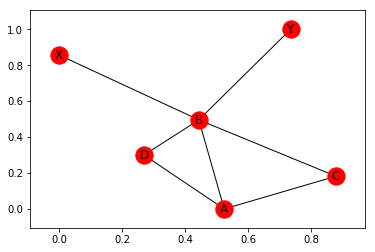

In [21]:
nx.draw_networkx(G)

Note, that the positions are determined at random and change every time. To see this, let's plot it again:

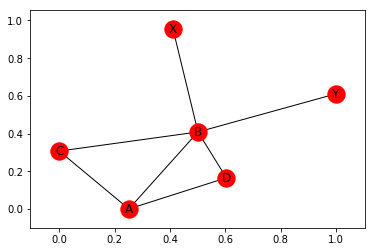

In [22]:
nx.draw_networkx(G)

If we want to fix the positions, we can pass them as parameters to the plotting function. To demonstrate this, I first use the `random_layout()` function to produce a dictionary of positions (again in spring-layout) for G:

In [29]:
pos = nx.random_layout(G)
print(pos)

{'A': array([ 0.59886804,  0.33216874]), 'B': array([ 0.64945533,  0.05144172]), 'C': array([ 0.81976687,  0.74986653]), 'D': array([ 0.8789488 ,  0.25981902]), 'X': array([ 0.9433076,  0.6760571]), 'Y': array([ 0.82230112,  0.31336599])}


As you might have noticed, the default plot style of `draw_networkx()` includes the axis in the plot. Since networkX uses matplotlib under the hood, we can interact with the graph using the usual set of matplotlib commands to switch off the axis.

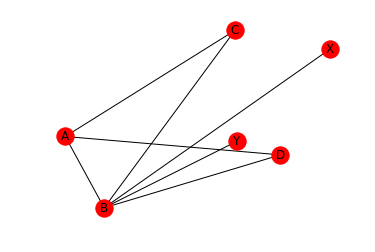

In [30]:
plt.axis('off')
nx.draw_networkx(G, pos)

We can also draw the graphs with a circular layout. When using the circular layout, we can use an aspect ration of 1:1 ('equal') to make the graph appear "more circular". Note that in contrast to `draw_networkx()`, `draw_circular()` by default does not display the node names. In order to display the node names, we set `with_labels=True`. Also note, that draw_circular's default behaviour is to switch of the axis.

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


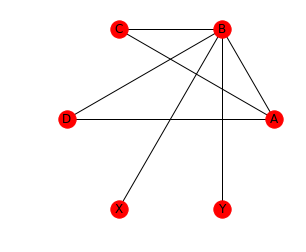

In [31]:
ax = plt.gca()
ax.set_aspect('equal')
nx.draw_circular(G, with_labels=True)

In order to further personalize the plot, we can change properties like node color and size, edge color and more. Let's demonstrate this using a small example. Let's assume we have a set of cities and would like to know where to move to. Things that we care about are size, quality of life (above, below or just average) and -since we don't have a car - if there is a direct train connection and if so, how fast it is (again: fast, slow, average). 

Let's see how we can visualize this in a meaningful way. 

For a basic visualization, let's create a set of six cities, each with attributes population and lifequality, connected by edges with the attribute speed. We also create a dictionary which assigns a name to each node. This will be used to label the nodes.

In [32]:
G = nx.MultiGraph()
G.add_nodes_from([('A', {'pop':1000, 'lifeq':'+'}), ('B', {'pop':5000, 'lifeq':'o'}),\
                  ('C', {'pop': 7500, 'lifeq':'+'}), ('D', {'pop': 3200, 'lifeq':'-'}),\
                 ('E', {'pop': 8500, 'lifeq':'o'}), ('F', {'pop':2100, 'lifeq':'-'})])

G.add_edges_from([ ('A', 'D', {'speed':'fast'}),
                   ('E', 'D', {'speed':'fast'}),
                   ('F', 'C', {'speed':'slow'}),
                  ('E', 'C', {'speed':'slow'}),
                 ('B', 'D', {'speed':'medium'}),
                 ('E', 'B', {'speed':'medium'}),
                 ('A', 'F', {'speed':'fast'})])

names = {'A': 'Appleville', 'B':'Boomtown', 'C':'Carrot-City', 'D':'Darktown', 'E':'Elephant-Gardens', 'F':'Fluxhole'}

Next we create the lists that we need to pass to networkx for the node and edge properties. To extract the node attributes we use the function `get_node_attributes()` which returns a dictionary with the node names as keys and the attribute as value. In order to use population as vertex-size, we scale it down by a factor of 10. We also create the color lists for nodes and edges.

In [33]:
# node size
population = [nx.get_node_attributes(G, 'pop')[node]/10. for node in G]

# node color
color_of_quality = {'+': 'green', '-':'red', 'o':'grey'}
quality_colors = [color_of_quality[nx.get_node_attributes(G, 'lifeq')[node]] for node in G]

# edge color
color_of_transport={'slow':'black', 'medium':'navy', 'fast':'gold'}
transport_colors = [color_of_transport[prop['speed']] for u, v, prop in G.edges(data=True)]

Finally, we produce the graph.

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


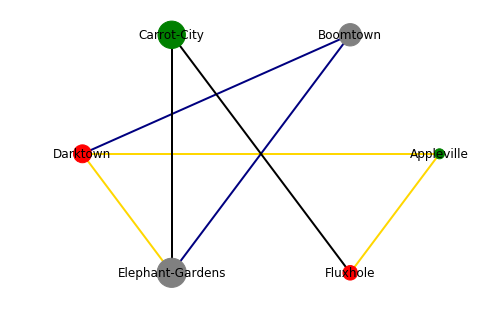

In [34]:
nx.draw_circular(G, \
                 node_size=population, \
                 node_color=quality_colors, \
                 edge_color=transport_colors, \
                 width=2, \
                 with_labels=True, \
                 labels=names)

As said before: Not very pretty, but it visualizes the information. We can easily see that Carrot-City has a good quality of life, but has only two direct train routes, which addtionally are slow. Darktown is a lot better connected (three direct train routes, two of them fast), but the quality of life is not great. Appleville has both a good quality of life and fast connections (at least to Darktown and Fluxhole), but it is very small, so if you are an opera fan, you might be up for a hard time. At the end, the choice is up to you, the information is there ;)

One note since talking about transport options: Taking this scenario a bit further, it would certainly be advantageous to be able to multiple edges (for example meaning different modes of transport, being after all a realistic assumption). Unfortunately, the native visualization of networkX does not support the plotting of multigraphs. To plot multigraphs, refer to one of the libraries mentioned in networkx's drawing documentation as for example [Graphviz](http://www.graphviz.org/). Graphviz can even be used online as for example [here](http://dreampuf.github.io/GraphvizOnline/). (Note of warning for this particular one: Whilst I found it to produce the nicest graphs out of the online versions which I tested, I also found it to time out regularly on my machine, so I advise to make copies often).

## Summary
In this post, we have had a quick look at some basics of graph theory and an overview of some fields where it is used. We have then from a practical perspective looked at how to work with graphs in python using the networkX module. We have looked at several options of loading data into networkX and once a graph is generated, how to manipulate it by adding new nodes, edges and attributes. In the second part, we have seen how to make some basic visualization to help us understand the data contained in our graphs better. 

In the next post in this series, I will talk about graph connectivity and measures of distances, which are two concepts needed to understand the concept of centrality (node and edge importance), which will be introduced in the third part. 

I hope you enjoyed the read :)